# Rating Split Analysis
I'm trying to find ELO boundaries which give the best looking tournament sizes. There will probably be overlap as a lot of players ar very close in ELO.

## Imports

In [1]:
import pandas as pd
import numpy as np
import datetime

## Read ELO data
Note that this requires that `0_download.ipynb` be run first to download the updated ratings.

In [2]:
scores = pd.read_csv('data/scores.csv')
scores['seenAt'] = pd.to_datetime(scores['seenAt'], unit='ms', origin='unix')
print(f'There are {scores.shape[0]} members with Chess960 ELOs')

There are 751 members with Chess960 ELOs


### Filter out inactive accounts
Only select the accounts that have been active within the last two weeks

In [3]:
today = datetime.datetime.today()
start_of_today = datetime.datetime(today.year, today.month, today.day, 0, 0, 0)
cutoff = start_of_today - datetime.timedelta(weeks=2)
cutoff

datetime.datetime(2021, 2, 25, 0, 0)

In [4]:
scores = scores[scores['seenAt'] >= cutoff]
print(f'There are {scores.shape[0]} active members with Chess960 ELOs')

There are 436 active members with Chess960 ELOs


Basic ELO visualization

Text(0.5, 0, 'ELO')

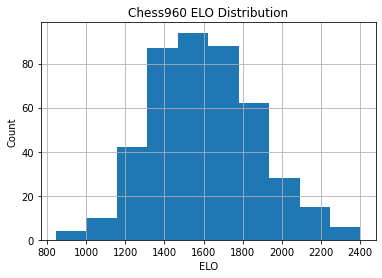

In [5]:
ax = scores['rating'].hist()
ax.set_title('Chess960 ELO Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('ELO')

## Determine ELO Splits
The following section will find the ELO boundaries that always give equal sized chunks (with overlap) 

### Define Split Size
Define split size to be a percentage of the total member population. For example, a split size of `33` would result in a perfect 3-way split.

In [6]:
SIZE = 40
CHUNKS = 4
print(f'Estimated Members / Arena: {SIZE * scores.shape[0] / 100 / CHUNKS}')

Estimated Members / Arena: 43.6


### Determine ELO splits

In [7]:
beginner_upper = np.percentile(scores['rating'], SIZE)
inter_lower = np.percentile(scores['rating'], 50 - (SIZE / 2))
inter_upper = np.percentile(scores['rating'], 50 + (SIZE / 2))
master_lower = np.percentile(scores['rating'], 100 - SIZE)

## Results

Splits

In [8]:
print(f'Beginnner bounds: (0,{beginner_upper}]')
print(f'Intermediate bounds: ({inter_lower},{inter_upper})')
print(f'Master bounds: ({master_lower},∞]')

Beginnner bounds: (0,1534.0]
Intermediate bounds: (1447.0,1737.0)
Master bounds: (1662.0,∞]


Members per arena

In [9]:
print('{} members in the Beginner arena.'.format(scores[scores['rating'] <= beginner_upper].shape[0] / CHUNKS))
print('{} members in the Intermediate arena.'.format(scores[(inter_lower <= scores['rating']) & (scores['rating'] <= inter_upper)].shape[0] / CHUNKS))
print('{} members in the Masters arena.'.format(scores[master_lower <= scores['rating']].shape[0] / CHUNKS))

43.75 members in the Beginner arena.
44.0 members in the Intermediate arena.
43.75 members in the Masters arena.
